Head       slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  
counts
 children_playing    1000
street_music        1000
dog_bark            1000
air_conditioner     1000
drilling            1000
jackhammer          1000
engine_idling       1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64


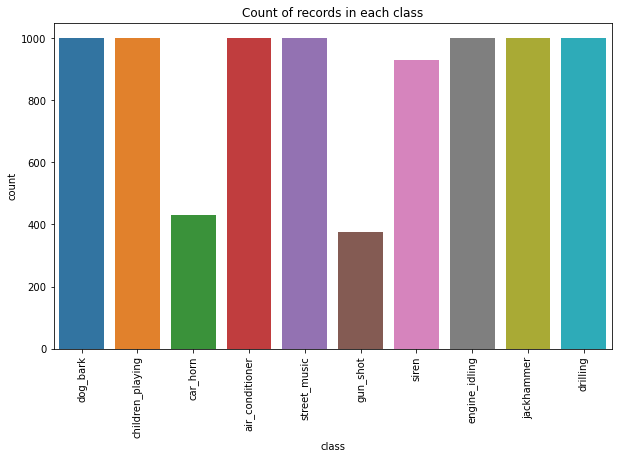

In [40]:
# Libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import pickle
from PIL import Image

import cv2 as cv
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")


# Read metadata file
metadata_file = "C://Users/murat/Desktop/DL-bootcamp/UrbanSound8K/metadata/UrbanSound8K.csv"
df = pd.read_csv(metadata_file)
print("Head",df.head())

print("counts\n",df['class'].value_counts())


plt.figure(figsize=(10, 6))
sns.countplot(df['class'])
plt.title("Count of records in each class")
plt.xticks(rotation="vertical")
plt.show()


unresized_shape: (374, 500, 3)
resized_shape: (128, 128)


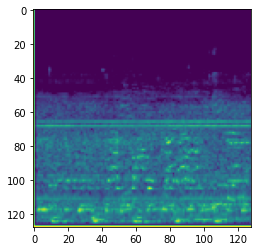

In [26]:
path_to_image_example = "C://Users/murat/Desktop/DL-bootcamp/spectrograms/0/13230-0-0-1.png"
image_example = cv.imread(path_to_image_example)
gray = cv.cvtColor(image_example, cv.COLOR_BGR2GRAY)
print("unresized_shape:",image_example.shape)
#resizing example:
resized_example = cv.resize(gray, (128,128))
print("resized_shape:",resized_example.shape)
plt.imshow(resized_example)
plt.show()

In [41]:
#all images
path_to_images="C:/Users/murat/Desktop/DL-bootcamp/spectrograms_merged"

onlyfiles = [f for f in listdir(path_to_images) if isfile(join(path_to_images, f))]
#print("number of files:",len(onlyfiles))

path_to_dataset="C:/Users/murat/Desktop/DL-bootcamp/spectrograms_merged"
images = []
errors_file = open("errors.txt", "a")
error = 0
number = 0

 
for image in onlyfiles:
   
    path_to_image = f"{path_to_dataset}/{image}"
    idx = path_to_image.split("-")
    #print("path_to_image",path_to_image)
    #print("idx:",idx[2])
   
    #print(type(path_to_image))
    try:
        img = cv.imread(path_to_image, cv.IMREAD_COLOR)
        #print(type(img))
        img = cv.resize(img, (128,128))
        images.append([img, int(idx[2])])

    except Exception as e:
          error += 1
          errors_file.write(f"{error}) {e}\n")
    finally:
          number += 1
          print(f"\rProcessed: {number} | Errors: {error}", end="")
    
errors_file.close()

Processed: 8732 | Errors: 0

In [42]:
#creating  images_list pickle file
with open("images_list.pickle", "wb") as f:
  pickle.dump(images, f)

In [43]:
#X and y
X = []
y = []

for image, idx in images:
  X.append(image)
  y.append(idx)

In [44]:
#train,validation,test
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

In [45]:
# 80% train, 10%  validation, 10% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42) 


In [46]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)  

In [47]:
#lengths
print("X_train:",len(X_train))
print("y_train:",len(y_train))

print("X_val:",len(X_val))
print("y_val:",len(y_val))

print("X_test:",len(X_test))
print("y_test:",len(y_test))

X_train: 7072
y_train: 7072
X_val: 786
y_val: 786
X_test: 874
y_test: 874


In [48]:
# X_train, X_val, X_test shape (Gray images)
print("X_train shape:",X_train[0].shape)

print("X_val shape:",X_val[0].shape)

print("X_test shape:",X_test[0].shape)

X_train shape: (128, 128, 3)
X_val shape: (128, 128, 3)
X_test shape: (128, 128, 3)


In [ ]:
#Divide each dataset by 255
X_train=X_train/255
X_val=X_val/255
X_test=X_test/255

In [ ]:
#saving splitted data
with open("X_train.pickle", "wb") as f:
  pickle.dump(X_train, f)  
with open("y_train.pickle", "wb") as f:
  pickle.dump(y_train, f)

with open("X_val.pickle", "wb") as f:
  pickle.dump(X_val, f)  
with open("y_val.pickle", "wb") as f:
  pickle.dump(y_val, f)

with open("X_test.pickle", "wb") as f:
  pickle.dump(X_test, f)  
with open("y_test.pickle", "wb") as f:
  pickle.dump(y_test, f)